# * 머신 러닝의 파이프라인

### 데이터 이해
- 데이터에 대한 기초적인 통계와 시각화, 변수간 관계 확인

### 평가 척도 이해
- 대회의 문제 의도 파악, 패널티 확인

### 교차 검증 기법 선정
- 일정 비율로 훈련/검증 데이터로 분리
- 훈련 데이터로 모델 학습하고 검증 데이터로 평가 → 다수 반복

### 피처 엔지니어링
- 학습에 사용할 데이터 준비: 스케일링, 이상값 제거, 결측값 대체, 범주형 데이터 변환, 변수 선정, 파생 변수 생성 등

### 모델 튜닝
- 교차 검증 점수를 기반으로 모델의 최적 파라미터 파악

### 앙상블
- 다수의 모델을 조합하여 사용


### * Feature engineering
#### (1) 수치로만 구성된 Feature vector 로 만들기
#### (2)  결측값 채우기
- fillna 함수 사용
- 일괄 값으로 채우기: min, mean, max, median 등 사용
- 연관되어 있는 열 정보를 기준으로 값 채우기

#### (3)  Binning(카테고리화하기)
- 연속적인 값으로 의미있는 정보를 찾기 어려울 때, 값을 구간별로 카테고리화하는 것


# 사례: 타이타닉호 생존자 예측

## 1. 문제 정의
- Titanic 호 탑승객의 특징(동승자, 성별, 티켓 클래스 등)에 따른 생존 결과 예측하기
- https://www.kaggle.com/c/2019-1st-ml-month-with-kakr/overview

### * 사용하는 모델
- KNeighborsClassifier(n_neighbors = k)
- DecisionTreeClassifier()
- RandomForestClassifier(n_estimators=k)
- GaussianNB()
- SVC(gamma = 'auto')

In [ ]:
from IPython.display  import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

## 2. 데이터 읽어오기

### * 캐글에서 받게되는 파일의 구성
- train.csv - 예측 모델을 만들기 위해 사용하는 학습셋
- test.csv - 예측 모델을 이용하여 예측할 탑승객 정보가 담긴 테스트셋
- submission.csv - 제출시 사용할 수 있는 csv 파일

- https://www.kaggle.com/c/titanic

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
from google.colab import drive
drive.mount('/content/drive')
PATH='/content/drive/MyDrive/ICTIS_2023/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv(PATH+'titanic/titanic_train.csv', index_col = 0)
test = pd.read_csv(PATH+'titanic/titanic_test.csv', index_col = 0)


## 3. 데이터 확인

In [ ]:
train.shape

(891, 11)

In [ ]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [ ]:
train.Pclass.unique()

array([3, 1, 2])

In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 데이터 설명
#### * 종속변수 (train 데이터 셋에만 포함되어 있음)
- Survival: 생존유무, target 값. (0 = 사망, 1 = 생존)

#### * 독립변수
- Pclass: 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: 이름
- Sex: 성별
- Age: 나이(세)
- SibSp (Siblings and spouse): 함께 탑승한 형제자매, 배우자 수 총합
- Parch (Parents and children): 함께 탑승한 부모, 자녀 수 총합
- Ticket: 티켓 넘버
- Fare: 탑승 요금
- Cabin: 객실 넘버
- Embarked: 탑승 항구(C=Cherbourg, Q=Queenstown, S=Southampton)

#### * 주의점: 결측값(NaN) 존재

## 4. 결측값 확인

In [ ]:
train.

In [ ]:
test.

## 5. 이상치 확인

In [ ]:
train.

In [ ]:
test.

## 6.컬럼별 범주형 자료 카테고리 확인

In [ ]:
train.

### * 함수 선언

In [ ]:
def bar_chart(feature):
    global train
    survived = train[train['Survived']==1][feature].value_counts()  #생존자만 추림      ,Series값
    dead = train[train['Survived']==0][feature].value_counts()      #사망자만 추림      ,Series값
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']  
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

In [ ]:
def histo(feature):
    global train
    plt.figure(figsize=(10,3) )
    sns.histplot(data=train, x=feature,
             hue='Survived' , multiple='dodge' , shrink=.8)
    plt.show()

In [ ]:
def bar_histo(feature):
    bar_chart(feature)
    histo(feature)

In [ ]:
train_test_data = [train, test]
def map_col(col, mapping_info):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(mapping_info)
        

## 7. 특성별 자료확인 및 결측치 처리

### (1) Survived

In [ ]:
train.Survived

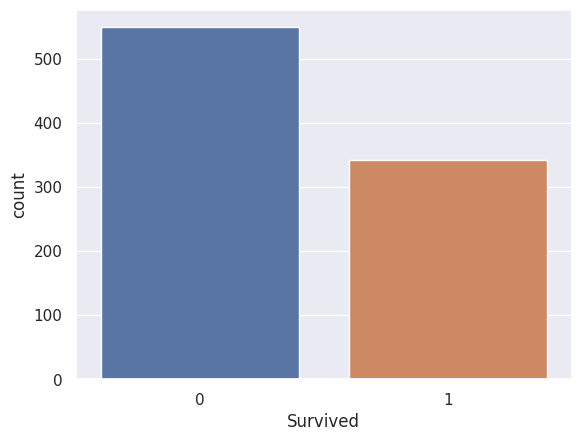

In [ ]:
sns.countplot(data=train, x='Survived' )
plt.show()

### (2) Pclass

In [ ]:
train.Pclass.value_counts()

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64

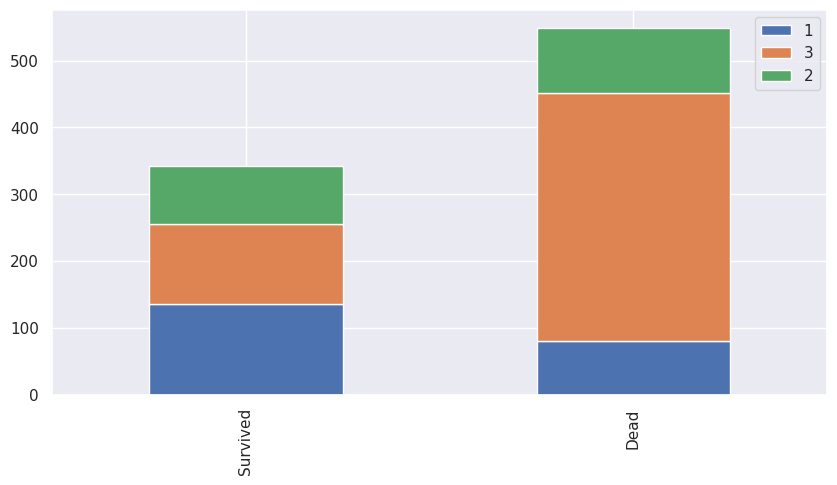

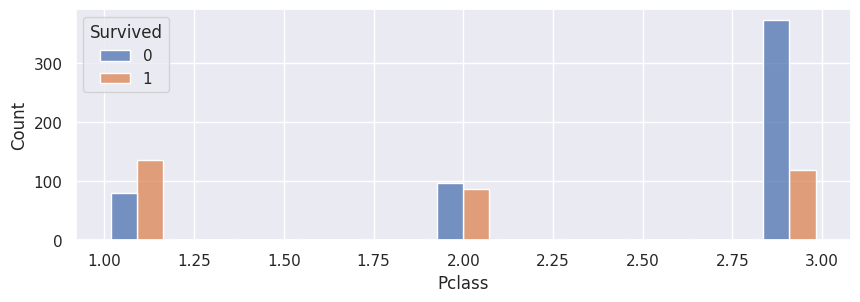

In [ ]:
bar_histo('Pclass')

### (3) Sex

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

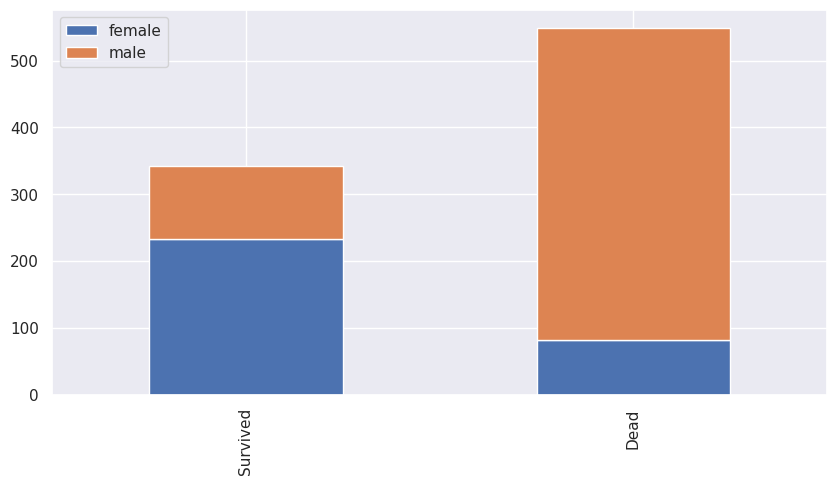

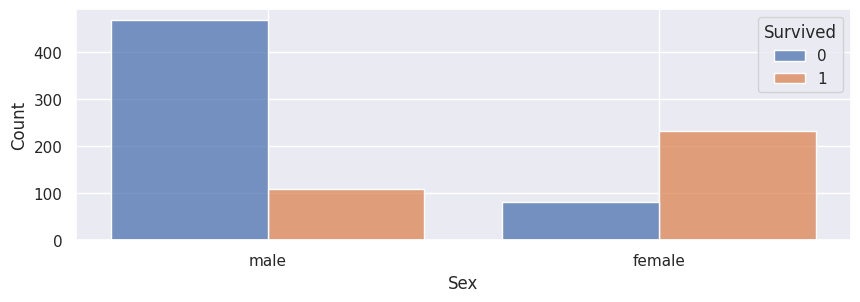

In [ ]:
bar_histo('Sex')

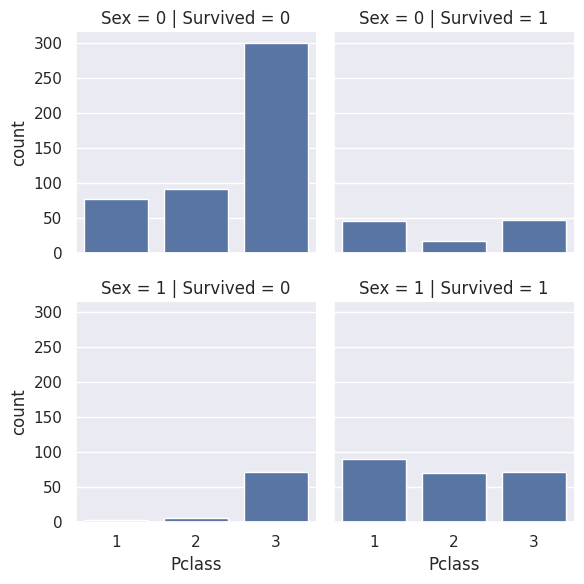

In [45]:
g = sns.FacetGrid(train, col='Survived', row='Sex')
g.map_dataframe(sns.countplot, x='Pclass')
plt.show()

### (4) Age

In [ ]:
train.Age.isnull().sum()

177

In [ ]:
train.Age.mean()

29.69911764705882

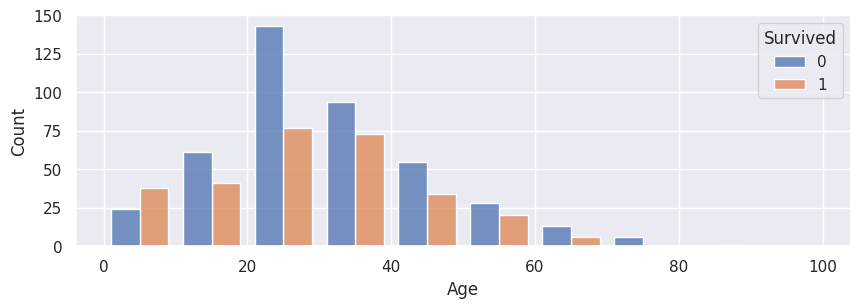

In [ ]:
plt.figure(figsize=(10,3) )
sns.histplot(data=train, x='Age', binrange=( 0, 100), bins=10, 
             hue='Survived' , multiple="dodge", shrink=.8)
plt.show()

In [ ]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### (5) SibSp
혼자 탑승하거나 (형제,배우자) 1명을 동반한 승객의 생존 비율이 높음

In [ ]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

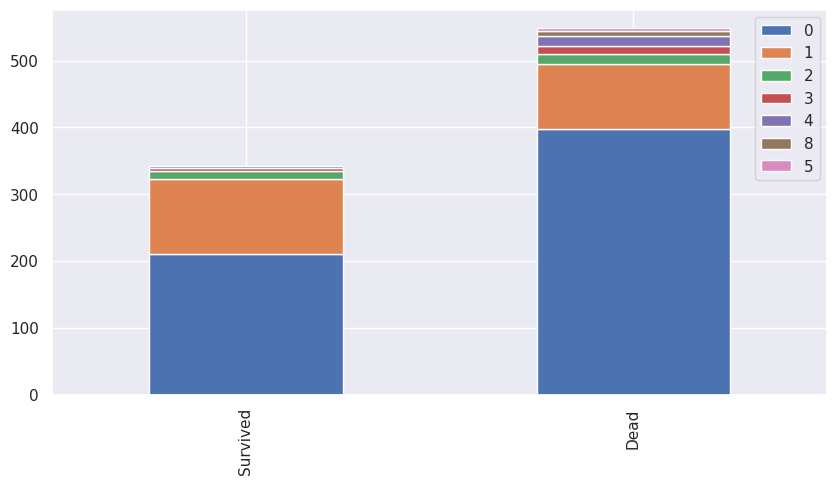

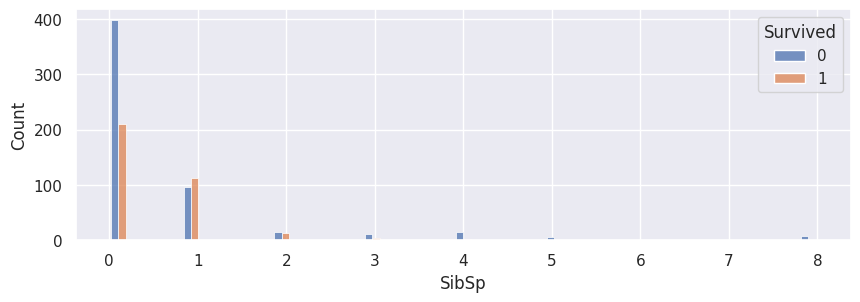

In [ ]:
bar_histo('SibSp')

### (6) Parch

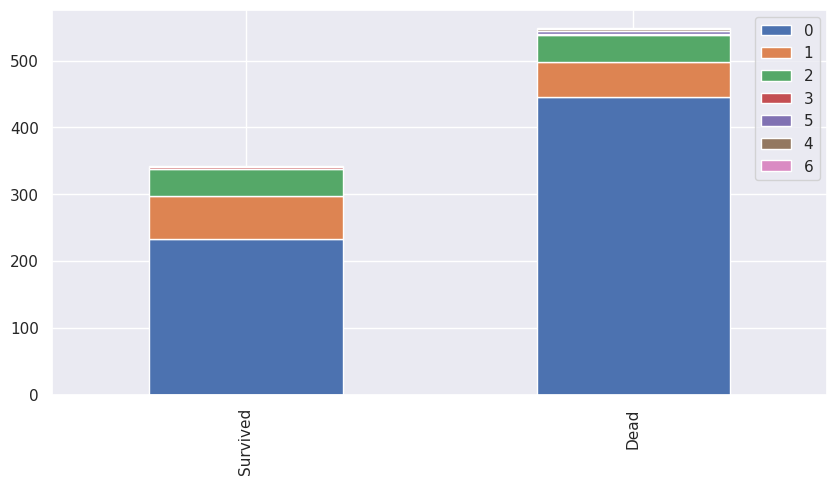

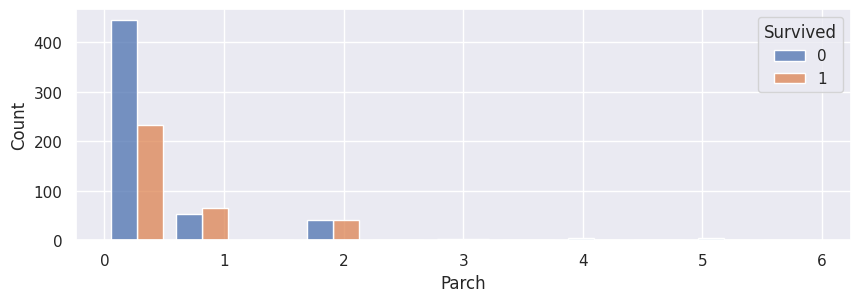

In [ ]:
bar_histo('Parch')

In [ ]:
train.Parch.isnull().sum()

0

In [ ]:
test.Parch.isnull().sum()

0

### (7) Fare

In [ ]:
train.Fare.value_counts()

8.0500     47
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
6.8583      1
8.6542      1
12.6500     1
12.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
# Fare의 min이 0.0이므로, 0.0의 자료를 찾아봄.
train[  ][   ]

In [ ]:
na_list = list(np.where(train.Fare != 0.0) [0])
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mid
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High_Mid
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High_Mid


In [ ]:
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
train['Fare'] = train['Fare'].replace(0.0,np.nan)
test['Fare'] = test['Fare'].replace(0.0, np.nan)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
#Fare가 0.0인 것을 각 Pclass의 median으로 채워줌
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
test.Fare.isnull().sum()

0

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
train["Fare_Category"] = pd.cut( train['Fare'], bins=[0.0, 7.9, 14.5, 31.0, 520], labels=['Low','Mid','High_Mid','High'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid


In [ ]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

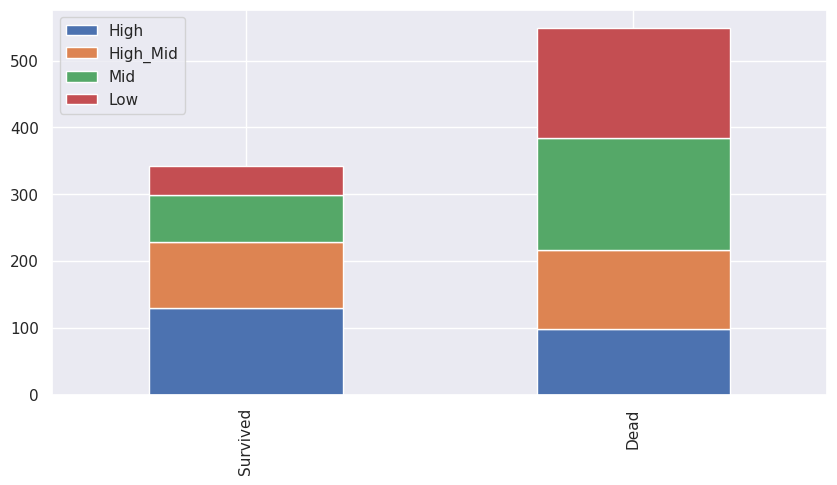

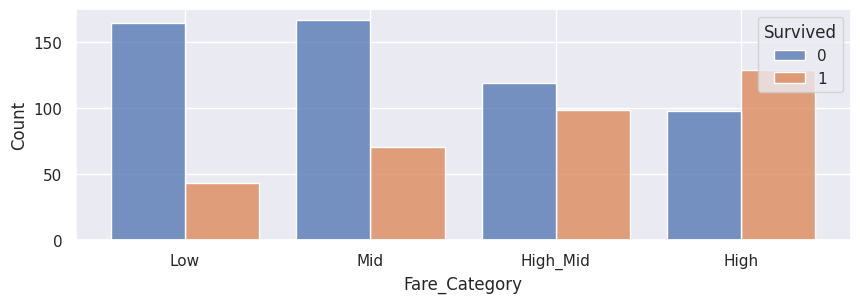

In [ ]:
bar_histo( 'Fare_Category')

In [ ]:
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,85.589391
2,0.472826,29.877630,0.402174,0.380435,21.152060
3,0.242363,25.140620,0.615071,0.393075,13.741131


### (8) Cabin

In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train['Cabin_Category'] = train.Cabin.str[:1]   # Cabin.str[0] 과 동일
test['Cabin_Category'] = train.Cabin.str[:1]
train['Cabin_Category'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

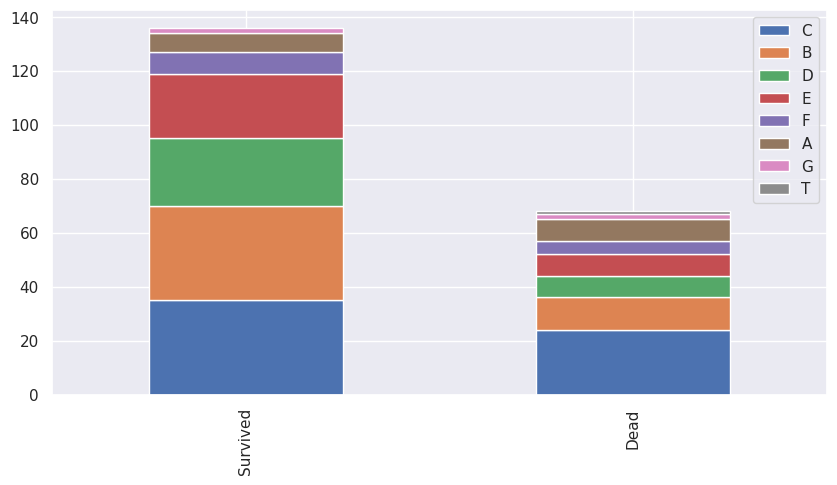

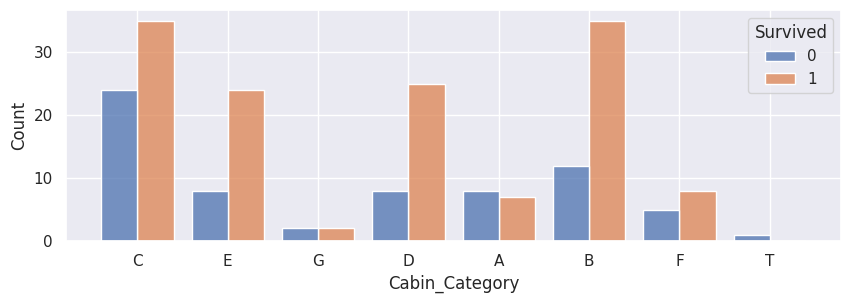

In [ ]:
bar_histo('Cabin_Category')

In [ ]:
train.Cabin.isnull().sum()

687

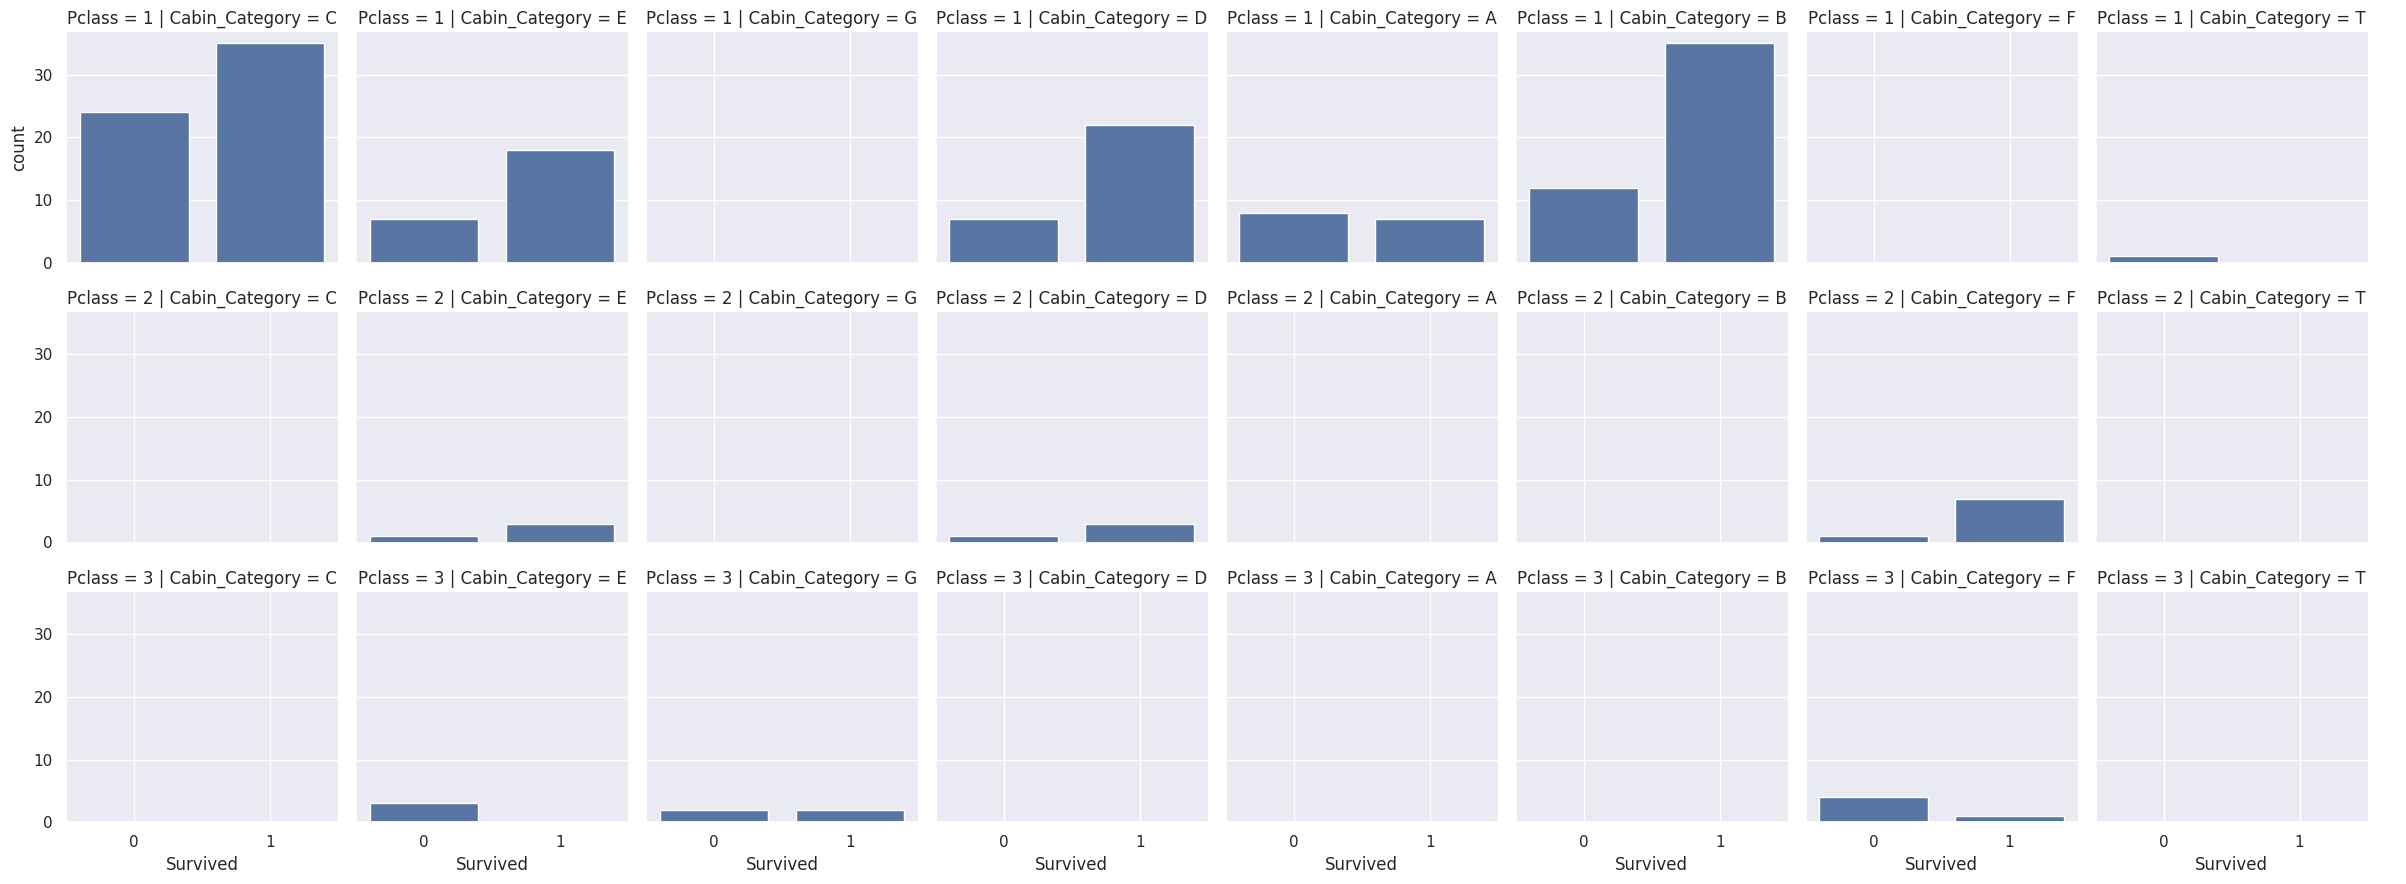

In [ ]:
g = sns.FacetGrid(data=train, col='Cabin_Category', row ='Pclass')
g.map_dataframe( sns.countplot, x='Survived' )
g.add_legend()
plt.show()

In [ ]:
# scaling하여 mapping
cabin_mapping = {char:i * 0.4 for i, char in enumerate(sorted(train['Cabin_Category'].unique()[1:]))}
map_col('Cabin_Category', cabin_mapping)
train.Cabin_Category.unique(), train.Cabin_Category.value_counts()

(array([nan, 0.8, 1.6, 2.4, 1.2, 0. , 0.4, 2. , 2.8]),
 0.8    59
 0.4    47
 1.2    33
 1.6    32
 0.0    15
 2.0    13
 2.4     4
 2.8     1
 Name: Cabin_Category, dtype: int64)

In [ ]:
train["Cabin_Category"] = train.Cabin.str[:1]
test["Cabin_Category"] = test.Cabin.str[:1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Cabin_Category
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mid,NaN
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,High_Mid,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,High_Mid,NaN


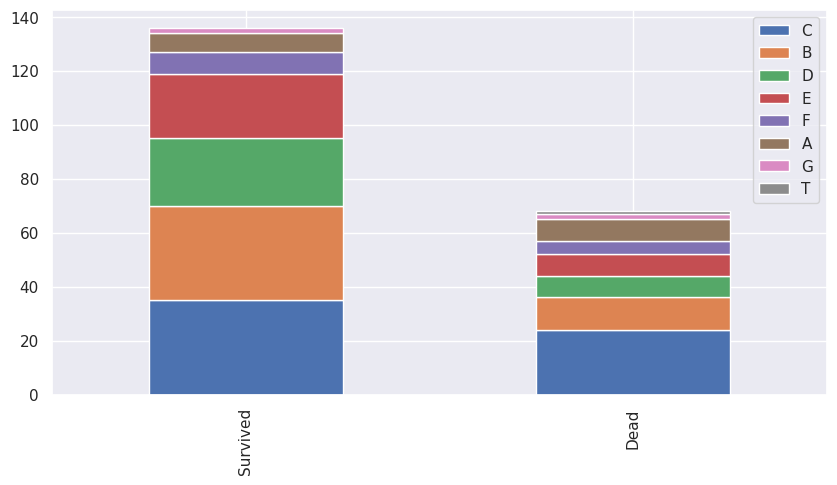

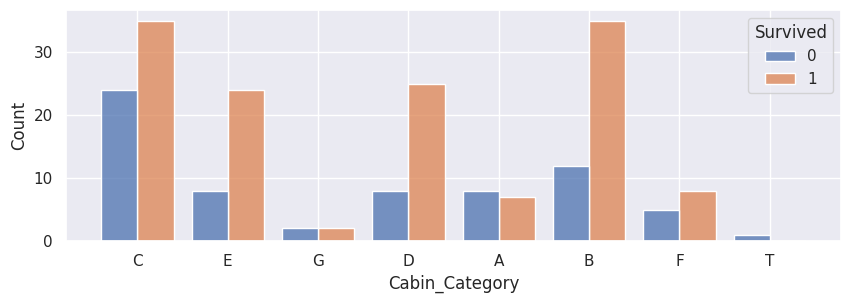

In [ ]:
bar_histo('Cabin_Category')

In [ ]:
train_test_data = [train,test]
def map_col(col, mapping_info):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(mapping_info)

(array([nan, 0.8, 1.6, 2.4, 1.2, 0. , 0.4, 2. , 2.8]),
 0.8    59
 0.4    47
 1.2    33
 1.6    32
 0.0    15
 2.0    13
 2.4     4
 2.8     1
 Name: Cabin_Category, dtype: int64)

In [ ]:
train["Cabin_Category"].fillna(train.groupby("Pclass")["Cabin_Category"].transform("median"), inplace=True)
test["Cabin_Category"].fillna(test.groupby("Pclass")["Cabin_Category"].transform("median"), inplace=True)

TypeError: ignored

In [ ]:
train.Cabin_Category.isnull().sum(), test.Cabin_Category.isnull().sum()

(0, 418)

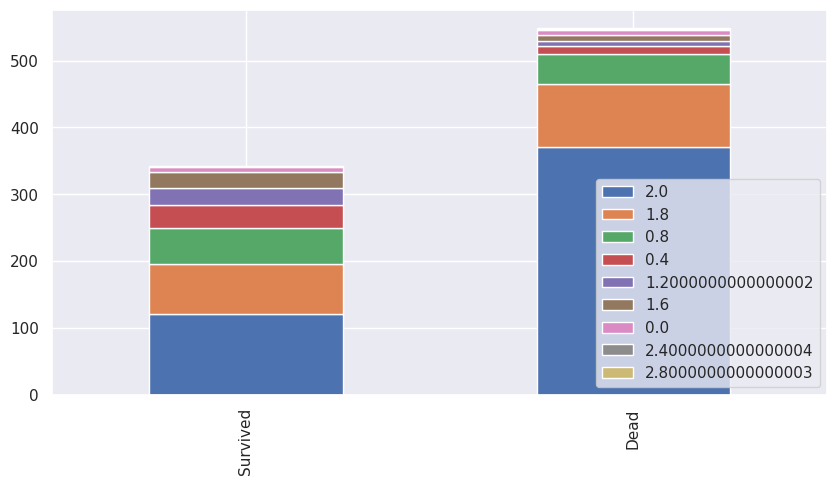

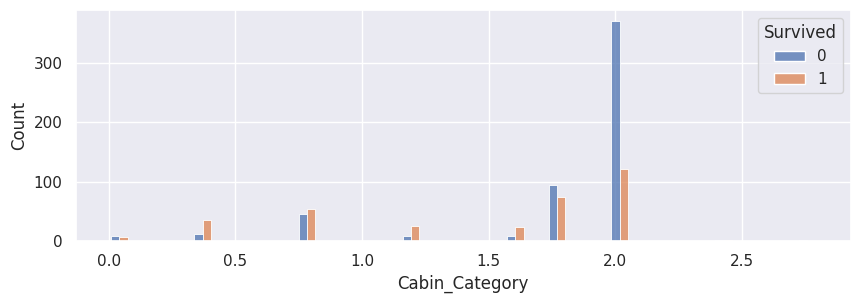

In [ ]:
bar_histo('Cabin_Category')

### (9) Embarked
승선한곳

In [ ]:
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(2, 0)

In [ ]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [ ]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')

train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(0, 0)

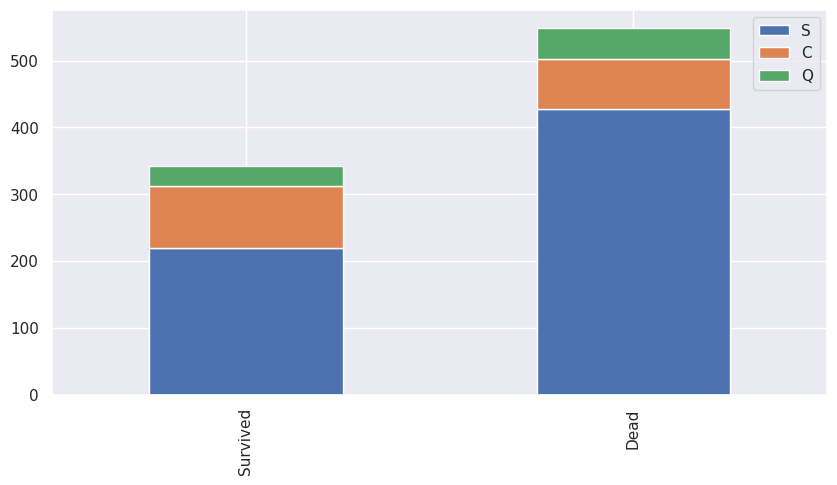

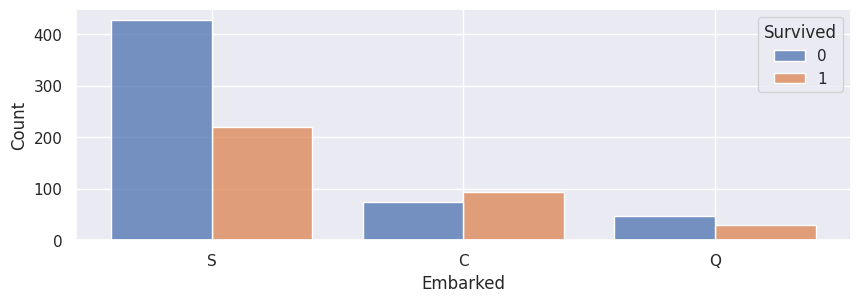

In [ ]:
bar_histo('Embarked')

## 8. Feature engineering
- 특성공학 : 컬럼에 연산 등을 통해서 의미있는 새로운 정보를 추출하는 분야

### 8.1 FamilySize 속성 추가

In [ ]:
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

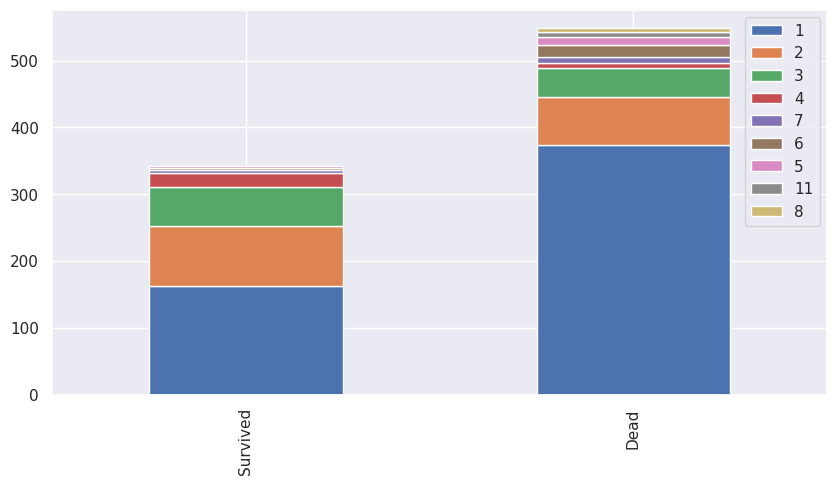

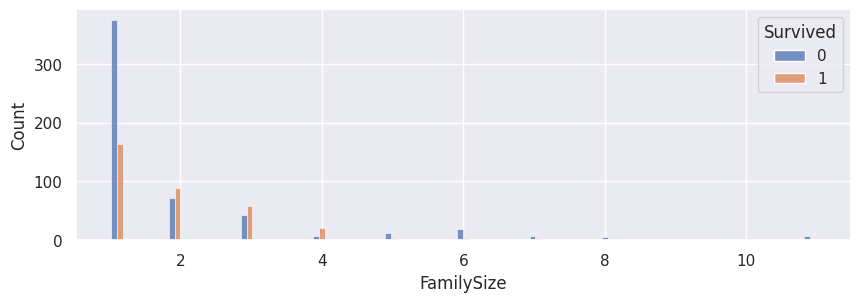

In [ ]:
bar_histo('FamilySize')

In [ ]:
# scaling 
family_mapping = {i+1 : i * 0.4 for i in range(11) }
map_col("FamilySize",family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

### 8.2 범주 데이터를 숫자로 맵핑

### (1) Embarked를 수치로 매핑

In [ ]:
train.Embarked.unique()

array([0, 1, 2])

In [ ]:
e_mapping = {char: i for i, char in enumerate(train.Embarked.unique())}
map_col("Embarked", e_mapping)

train.Embarked.value_counts(), test.Embarked.value_counts()

(0    646
 1    168
 2     77
 Name: Embarked, dtype: int64,
 0    270
 1    102
 2     46
 Name: Embarked, dtype: int64)

### (2) 성별 데이터를 숫자로 맵핑

In [ ]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
s_map =  {char:i for i, char in enumerate(train.Sex.unique())}
map_col("Sex", s_map)
train.Sex.value_counts(), test.Sex.value_counts()

(0    577
 1    314
 Name: Sex, dtype: int64,
 0    266
 1    152
 Name: Sex, dtype: int64)

### 8.3 Name

In [ ]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
train_test_data = [train, test]
# 이름에서 title만 추출하여 Title feature 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train.Title.unique(), test.Title.unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
        'Jonkheer'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
       dtype=object))

In [ ]:
(train.Title.value_counts()+ test.Title.value_counts()).sort_values(ascending=False)

Mr          757.0
Miss        260.0
Mrs         197.0
Master       61.0
Dr            8.0
Rev           8.0
Col           4.0
Ms            2.0
Capt          NaN
Countess      NaN
Don           NaN
Dona          NaN
Jonkheer      NaN
Lady          NaN
Major         NaN
Mlle          NaN
Mme           NaN
Sir           NaN
Name: Title, dtype: float64

In [ ]:
len(train.Title.value_counts()+ test.Title.value_counts())

18

In [ ]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2}
map_col("Title", title_mapping)

train["Title"].fillna(3, inplace=True)
test["Title"].fillna(3, inplace=True)

train.Title.unique(), test.Title.unique(), train.Title.value_counts(), test.Title.value_counts()

(array([3.]),
 array([3.]),
 3.0    891
 Name: Title, dtype: int64,
 3.0    418
 Name: Title, dtype: int64)

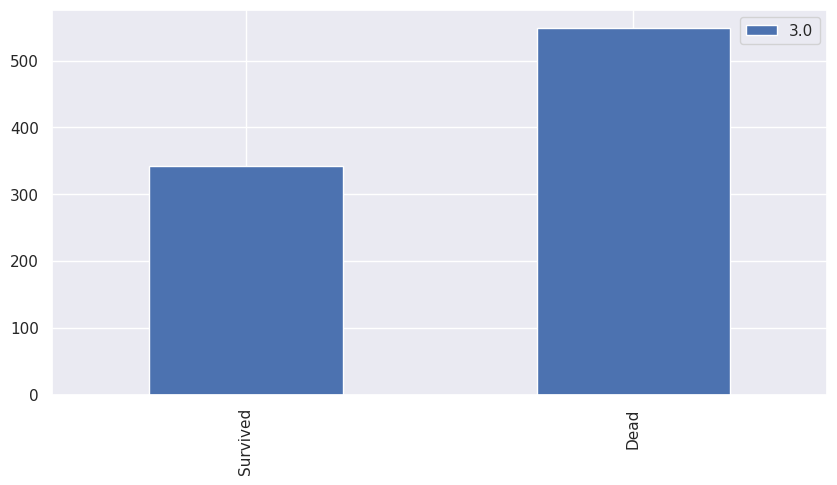

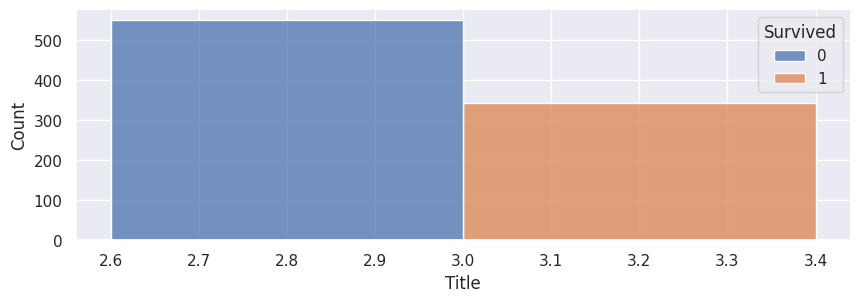

In [ ]:
bar_histo('Title')

In [ ]:
train.drop('Name', axis=1,  inplace=True)
test.drop('Name',  axis=1, inplace=True)
train.shape, test.shape

((891, 14), (418, 12))

### 8.4 Age 결측값 처리

In [ ]:
train.Age

In [ ]:
train['AgeMedian'] = train.groupby("Title")["Age"].transform("median")
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Cabin_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,Low,NaN,0.4,3.0,28.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,High,C,0.4,3.0,28.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Mid,NaN,0.0,3.0,28.0
4,1,1,1,35.0,1,0,113803,53.1000,C123,0,High,C,0.4,3.0,28.0
5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,Mid,NaN,0.0,3.0,28.0
6,0,3,0,NaN,0,0,330877,8.4583,NaN,2,Mid,NaN,0.0,3.0,28.0
7,0,1,0,54.0,0,0,17463,51.8625,E46,0,High,E,0.0,3.0,28.0
8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,High_Mid,NaN,1.6,3.0,28.0
9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,Mid,NaN,0.8,3.0,28.0


In [ ]:
# title(Mr, Mrs, Miss, others)에 따른 중앙값
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Cabin_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,Low,NaN,0.4,3.0,28.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,High,C,0.4,3.0,28.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Mid,NaN,0.0,3.0,28.0
4,1,1,1,35.0,1,0,113803,53.1000,C123,0,High,C,0.4,3.0,28.0
5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,Mid,NaN,0.0,3.0,28.0
6,0,3,0,28.0,0,0,330877,8.4583,NaN,2,Mid,NaN,0.0,3.0,28.0
7,0,1,0,54.0,0,0,17463,51.8625,E46,0,High,E,0.0,3.0,28.0
8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,High_Mid,NaN,1.6,3.0,28.0
9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,Mid,NaN,0.8,3.0,28.0


### 8.5 범위에 따라 카테고리화

### (1) Age

In [ ]:
train['Age_Category'] = pd.cut(train['Age'], bins=[0,16,26,36,62,100], labels=[0,1,2,3,4])
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Cabin_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,Low,NaN,0.4,3.0,28.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,High,C,0.4,3.0,28.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Mid,NaN,0.0,3.0,28.0,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,0,High,C,0.4,3.0,28.0,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,Mid,NaN,0.0,3.0,28.0,2
6,0,3,0,28.0,0,0,330877,8.4583,NaN,2,Mid,NaN,0.0,3.0,28.0,2
7,0,1,0,54.0,0,0,17463,51.8625,E46,0,High,E,0.0,3.0,28.0,3
8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,High_Mid,NaN,1.6,3.0,28.0,0
9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,Mid,NaN,0.8,3.0,28.0,2


In [ ]:
test['Age_Category'] = pd.cut(test['Age'], bins=[0,16,26,36,62,100], labels=[0,1,2,3,4])
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Category,FamilySize,Title,Age_Category
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,NaN,2,NaN,0.0,3.0,2
893,3,1,47.0,1,0,363272,7.0000,NaN,0,NaN,0.4,3.0,3
894,2,0,62.0,0,0,240276,9.6875,NaN,2,NaN,0.0,3.0,3
895,3,0,27.0,0,0,315154,8.6625,NaN,0,NaN,0.0,3.0,2
896,3,1,22.0,1,1,3101298,12.2875,NaN,0,NaN,0.8,3.0,1
897,3,0,14.0,0,0,7538,9.2250,NaN,0,NaN,0.0,3.0,0
898,3,1,30.0,0,0,330972,7.6292,NaN,2,NaN,0.0,3.0,2
899,2,0,26.0,1,1,248738,29.0000,NaN,0,NaN,0.8,3.0,1
900,3,1,18.0,0,0,2657,7.2292,NaN,1,NaN,0.0,3.0,1


### (2) Fare

In [ ]:
train.Fare

In [ ]:
train['Fare_Category'] = pd.cut(train['Fare'], bins=[0,8,15,32,1000], labels=[0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'], bins=[0,8,15,32,1000], labels=[0,1,2,3])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Cabin_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,NaN,0.4,3.0,28.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,3,C,0.4,3.0,28.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,NaN,0.0,3.0,28.0,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,0,3,C,0.4,3.0,28.0,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,1,NaN,0.0,3.0,28.0,2


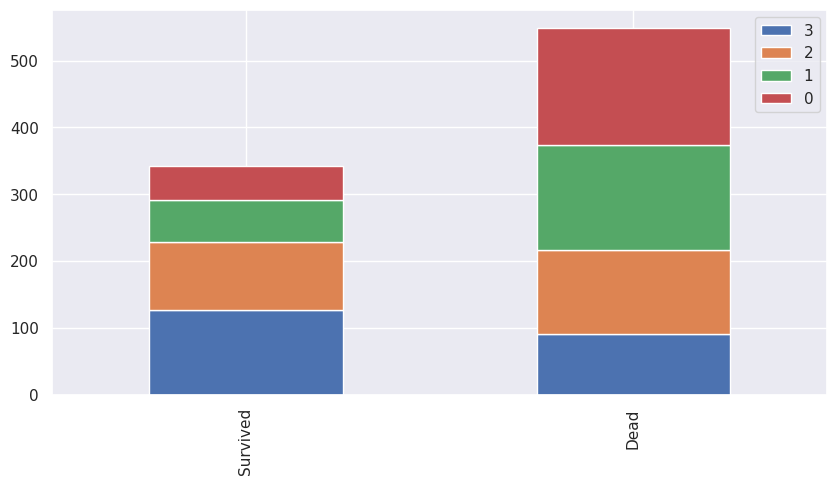

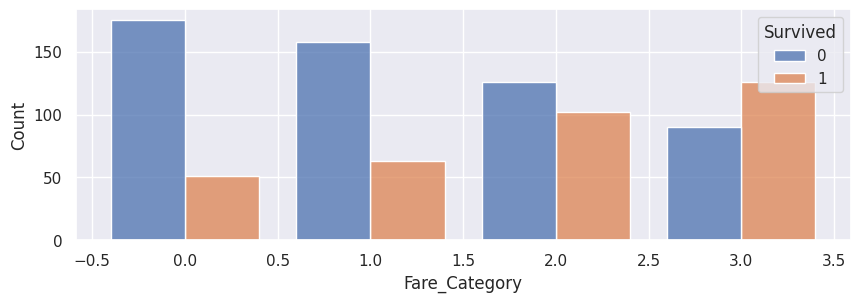

In [ ]:
bar_histo('Fare_Category')

## 9. 모델 적용

###  (1) 종속 변수와 독립 변수 설정

In [46]:
features = ['Pclass', 'Sex', 'Age_Category', 'Fare_Category', 
              'Cabin_Category', 'Embarked', 'Title','FamilySize']
x_train = train[features]
x_test  = test [features]
y_train = train['Survived']

In [24]:
x_train.shape, x_test.shape

((891, 8), (418, 8))

In [25]:
x_train.isnull().sum()

Pclass              0
Sex                 0
Age_Category        0
Fare_Category       0
Cabin_Category    687
Embarked            0
Title               0
FamilySize          0
dtype: int64

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train.to_csv(PATH+'titanic/train_new.csv')

NameError: ignored

In [35]:
test.to_csv(PATH+'titanic/test_new.csv')

In [36]:
train = pd.read_csv(PATH+'titanic/train_new.csv')
test = pd.read_csv(PATH+'titanic/test_new.csv')

In [37]:
test

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Category,FamilySize,Title,Age_Category,Fare_Category
0,0,892,3,0,34.5,0,0,330911,7.8292,NaN,2,NaN,0.0,3.0,2,0
1,1,893,3,1,47.0,1,0,363272,7.0000,NaN,0,NaN,0.4,3.0,3,0
2,2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,NaN,0.0,3.0,3,1
3,3,895,3,0,27.0,0,0,315154,8.6625,NaN,0,NaN,0.0,3.0,2,1
4,4,896,3,1,22.0,1,1,3101298,12.2875,NaN,0,NaN,0.8,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,1305,3,0,27.0,0,0,A.5. 3236,8.0500,NaN,0,NaN,0.0,3.0,2,1
414,414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,1,C,0.0,3.0,3,3
415,415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,NaN,0.0,3.0,3,0
416,416,1308,3,0,27.0,0,0,359309,8.0500,NaN,0,NaN,0.0,3.0,2,1


### (2) 교차 검증

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

def getScore(clf):    
    score = cross_val_score(clf, x_train, y_train,
                        cv=k_fold, n_jobs=1, scoring='accuracy')
    return score    

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [47]:
knn= KNeighborsClassifier(n_neighbors=13, weights='distance')
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(n_estimators=13, random_state=0)
nb = GaussianNB()
svm = SVC(gamma='auto')

scores = pd.DataFrame([
    getScore(knn),
    getScore(dt),
    getScore(rf),
    getScore(nb),
    getScore(svm)],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM'] )

ValueError: ignored

In [40]:
knn= KNeighborsClassifier(n_neighbors = 13, weights='distance')
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(n_estimators=13, random_state=0)
nb = GaussianNB()
svm = SVC(gamma = 'auto')

In [41]:
scores = pd.DataFrame([
    getScore(knn),
    getScore(dt),
    getScore(rf),
    getScore(nb),
    getScore(svm)],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM'] )

ValueError: ignored

In [ ]:
scores['Mean'] = np.around(scores.max())

### (3) 앙상블 &예측

In [43]:
def getPredict(clf):
    global x_train, y_train, x_test

    clf.fit(x_train, y_train)
    return clf.predict(x_test)
    

In [44]:
prediction = pd.DataFrame({
    'KNN' : getPredict(knn),
    'DT' : getPredict(dt),
    'RF' : getPredict(rf),
    'NB' : getPredict(nb),
    'SVM' : getPredict(svm)

    })

prediction.head(20)

ValueError: ignored

In [48]:
prediction['Survived'] = (prediction.sum(axis=1) >=3) *1

NameError: ignored

## 10. Submission

In [49]:
submission = pd.DataFrame({
        "PassengerId":  test.PassengerId,
        "Survived":    prediction['Survived']
    })
submission.tail()

NameError: ignored

In [50]:
submission.to_csv(PATH+'titanic/submission.csv' )   #캐글에 업로드

NameError: ignored